### 1. Acquiring Data 

In [1]:
#Import Required Libraries
import numpy as np 
import pandas as pd
from sklearn import metrics

### 2. Exploratory Data Analysis 

In [2]:
#Read Data from Dataset
bank_df = pd.read_csv(r"C:\Users\Deepak Prakash\source\repos\Bank Marketing Analysis\Dataset (6MB)\bank-additional-full.csv",delimiter=';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Checks the columns and data, eg Age,Cabin column has some missing data 
# We would require some feature engineering for missing data
bank_df.info()                  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank_df.shape  #There are 41188 rows and 21 columns

(41188, 21)

#### As per Problem Statement there are Missing Value Attributes 

In [5]:
# Missing Attribute Values: There are several missing values in some categorical attributes, 
#all coded with the "unknown" label. These missing values can be treated as a possible class label 
#or using deletion or imputation techniques.

bank_df.isnull().sum() 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Requirement: To Check if  Client would subscribe To Term Deposit Or Not

In [7]:
for col in bank_df.select_dtypes(include='object').columns:
    print(col)
    print(bank_df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [8]:
bank_df = bank_df.rename(columns={'y':'deposit'})
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
bank_df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [10]:
unknown_jobs = bank_df.query('job == "unknown"')
unknown_jobs['deposit'].value_counts()

no     293
yes     37
Name: deposit, dtype: int64

In [11]:
pdays = bank_df.query('pdays == "999"')  #1115, #39673
pdays['deposit'].value_counts()

no     36000
yes     3673
Name: deposit, dtype: int64

In [12]:
bank_df[['emp.var.rate','deposit']].value_counts()

emp.var.rate  deposit
 1.4          no         15368
-1.8          no          7723
 1.1          no          7523
-0.1          no          3451
-1.8          yes         1461
-2.9          no          1069
 1.4          yes          866
-3.4          no           617
-2.9          yes          594
-3.4          yes          454
-1.7          yes          403
              no           370
-1.1          no           334
              yes          301
 1.1          yes          240
-0.1          yes          232
-3.0          yes           88
              no            84
-0.2          no             9
              yes            1
dtype: int64

###  3. Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Catergorical Feature Distribution
# Relationship between Categorical Features and Labels
# Relationship betweeen Numerical Features and Labels

In [15]:
bank_df.deposit.value_counts()

no     36548
yes     4640
Name: deposit, dtype: int64

In [16]:
bank_df.deposit.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: deposit, dtype: float64

<AxesSubplot:title={'center':'Deposit'}>

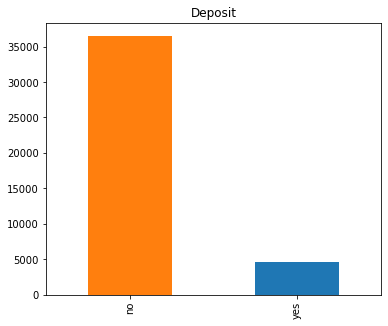

In [17]:
bank_df.deposit.value_counts().plot(kind='bar',stacked=True,figsize=(6,5),color=['C1','C0'],title='Deposit')

In [18]:
categorical_feature_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
categorical_feature_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [19]:
numerical_feature_list = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
numerical_feature_list

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

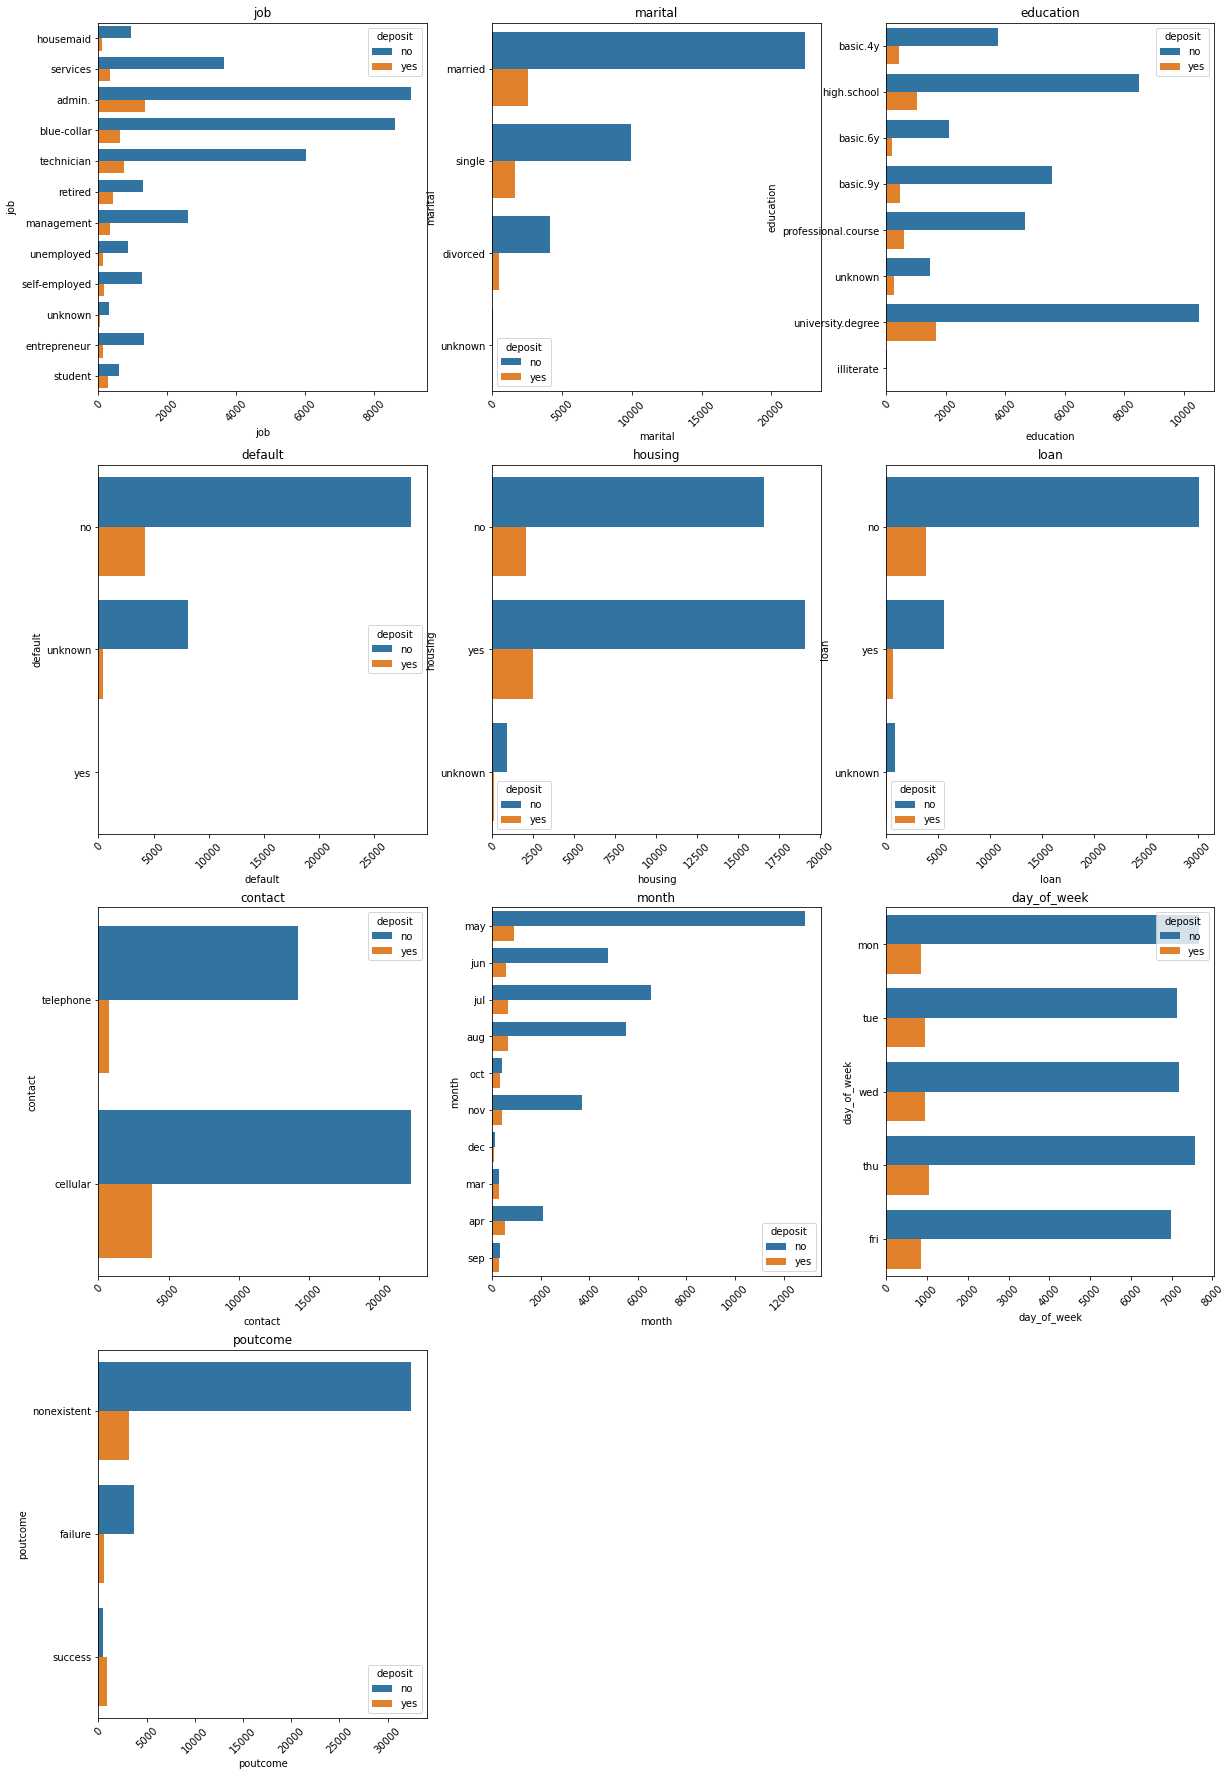

In [20]:
plt.figure(figsize=(20,80), facecolor='white')
plotnumber =1
for feature in categorical_feature_list:
    ax = plt.subplot(10,3,plotnumber)
    sns.countplot(y=feature,hue='deposit',data=bank_df)
    plt.xlabel(feature)
    plt.title(feature)
    plt.xticks(rotation=45)
    plotnumber+=1
plt.show()

In [21]:
bank_df[numerical_feature_list].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [22]:
bank_df[numerical_feature_list].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### 4. Feature Engineering
Feature engineering is the process of using domain knowledge of the data
to create features (feature vectors) that make machine learning algorithms work.

feature vector is an n-dimensional vector of numerical features that represent some object.
Many algorithms in machine learning require a numerical representation of objects,
since such representations facilitate processing and statistical analysis.

Some of the techniques that can be used are


In [23]:
def drawhist(bank_df,feature):
    plt.hist(bank_df[feature])

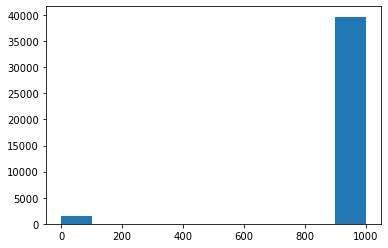

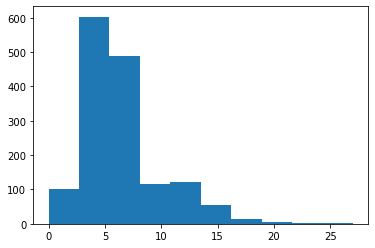

In [24]:
drawhist(bank_df,'pdays')
plt.show()

plt.hist(bank_df.loc[bank_df.pdays != 999, 'pdays'])
plt.show()

In [25]:
pd.crosstab(bank_df['pdays'],bank_df['poutcome'], values=bank_df['age'], aggfunc='count', normalize=True)

poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.000364
1,0.000000,0.000000,0.000631
2,0.000000,0.000000,0.001481
3,0.000097,0.000000,0.010561
4,0.000049,0.000000,0.002816
5,0.000097,0.000000,0.001020
6,0.000607,0.000000,0.009396
7,0.000364,0.000000,0.001093
8,0.000146,0.000000,0.000291


In [26]:
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [27]:

bank_df['deposit'].groupby(bank_df['deposit']).count()

deposit
no     36548
yes     4640
Name: deposit, dtype: int64

In [28]:
bank_df2=bank_df.copy()
bank_df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
bank_df2.shape

(41188, 21)

In [30]:
bank_df2.groupby(['deposit','default']).size()

deposit  default
no       no         28391
         unknown     8154
         yes            3
yes      no          4197
         unknown      443
dtype: int64

In [31]:
bank_df2.drop(['default'],axis=1, inplace=True)

In [32]:
#bank_df2.groupby(['deposit','pdays']).size()

In [33]:
bank_df2.drop(['pdays'],axis=1, inplace=True)

In [34]:
bank_df3 = bank_df2[bank_df2['campaign'] < 33]

In [35]:
bank_df3.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [36]:
bank_df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           15342
         2            9359
         3            4767
         4            2402
         5            1479
         6             904
         7             591
         8             383
         9             266
         10            213
         11            165
         12            122
         13             88
         14             68
         15             49
         16             51
         17             54
         18             33
         19             26
         20             30
         21             24
         22             17
         23             15
         24             15
         25              8
         26              8
         27             11
         28              8
         29             10
         30              7
         31              7
         32              4
yes      1            2300
         2            1211
         3             574
         4             249
         5

In [37]:
bank_df4 = bank_df3[bank_df3['previous'] < 31]

In [38]:
bank_df4.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [39]:
bank_df4.drop(['day_of_week'],axis=1, inplace=True)

In [40]:
bank_df4.head()

,age,job,marital,education,housing,loan,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,telephone,may,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Convert Column Data to Binary Data (Encoding using get_dummies())  

In [41]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    bank_df4 = pd.concat([bank_df4.drop(col, axis=1),pd.get_dummies(bank_df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [42]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    bank_df4[col+'_new']=bank_df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    bank_df4.drop(col, axis=1, inplace=True)

In [43]:
bank_df4.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,housing_new,loan_new,deposit_new
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,1,0,0,0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,1,0,0,0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,1,0,1,0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,1,0,0,0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,1,0,0,1,0


In [44]:
#bank_df5=bank_df4.drop(['day_of_week'],axis=1, inplace=True)

In [45]:
#bank_df5.head()

### Split Dataset into Training and Testing 

In [46]:
X = bank_df4.drop(['deposit_new'],axis=1)
y = bank_df4['deposit_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.75, random_state=0)

In [47]:
len(X_train)

10291

In [48]:
len(X_test)

30875

#### Model Selection 

In [49]:
# will try to use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#from xgboost import XGBClassifier
#from sklearn.model_selection import GridSearchCV

In [50]:
X_train

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,housing_new,loan_new
9707,36,152,2,0,1.4,94.465,-41.8,4.961,5228.1,0,...,1,0,0,0,0,0,1,0,1,0
28398,36,96,4,0,-1.8,93.075,-47.1,1.435,5099.1,0,...,0,0,0,0,0,0,1,0,1,0
13606,32,349,1,0,1.4,93.918,-42.7,4.963,5228.1,0,...,0,0,0,0,0,0,1,0,0,0
31037,46,368,1,0,-1.8,92.893,-46.2,1.344,5099.1,0,...,0,0,1,0,0,0,1,0,1,0
26481,34,183,2,1,-0.1,93.200,-42.0,4.076,5195.8,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20779,36,529,1,0,1.4,93.444,-36.1,4.965,5228.1,0,...,0,0,0,0,0,0,1,0,1,0
32125,43,105,1,0,-1.8,92.893,-46.2,1.313,5099.1,0,...,0,0,1,0,0,0,1,0,1,0
30425,27,117,3,0,-1.8,93.075,-47.1,1.365,5099.1,0,...,0,0,0,0,0,0,1,0,1,1
21265,30,191,1,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,0,0,0,0,0,1,0,1,0


In [51]:
y_train

9707     0
28398    0
13606    0
31037    0
26481    0
        ..
20779    1
32125    0
30425    0
21265    0
2732     0
Name: deposit_new, Length: 10291, dtype: int64

In [57]:
decision_tree_model_score =cross_val_score(estimator=DecisionTreeClassifier(),X=X_train, y=y_train, cv=5)
print(decision_tree_model_score)
print(decision_tree_model_score.mean())
decision_tree_score = decision_tree_model_score.mean()

[0.89044289 0.88629738 0.87521866 0.89970845 0.88804665 0.89154519]
0.8885432028289171


In [54]:
from sklearn.svm import SVC

In [55]:
svm_model_score =cross_val_score(estimator=SVC(),X=X_train, y=y_train, cv=5)
print(svm_model_score)
print(svm_model_score.mean())

[0.8863526  0.88678328 0.88678328 0.88629738 0.88678328]
0.8865999657338826


In [58]:
print('From the above experiments the accuracy of Decision Tree was higher compared to SVC and the accuracy is:',decision_tree_score)

From the above experiments the accuracy of Decision Tree was higher compared to SVC and the accuracy is: 0.8885432028289171


#### History 